In [2]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import random
import cv2
from PIL import Image
from skimage import morphology

In [3]:
test_folder='../../data/raw/example_image/'
test_folder1 = '../../data/raw/example_segmentation/'
file1 = os.listdir(test_folder1)
file = os.listdir(test_folder)
#image_path= os.path.join(test_folder,file)
#img=plt.imread(image_path)
#for i in file[1:5]:
#    image_path= os.path.join(test_folder1,i)
#    img=plt.imread(image_path)
#    axes = plt.subplots(1)
#    plt.imshow(img);

In [4]:
#def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#image_path= os.path.join(test_folder1,file[1])
#img=plt.imread(image_path)
##print(img)
#grey = rgb2gray(img)
#plt.imshow(grey)
#print(grey)

In [5]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [6]:
#for i in load_images_from_folder(test_folder1):
    #print(i.shape)

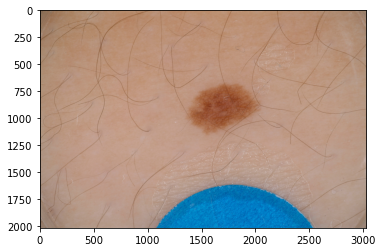

In [7]:
image_path1 = os.path.join(test_folder1,file1[0])
image_path = os.path.join(test_folder,file[1])
img1 = plt.imread(image_path1)
img = plt.imread(image_path)
plt.imshow(img)

../../data/raw/example_segmentation/ISIC_0001769_segmentation.png
../../data/raw/example_image/ISIC_0001769.jpg


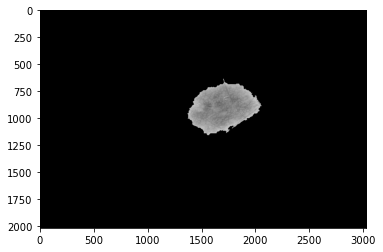

In [8]:
#CORRECT
im1 = Image.open(image_path)
im2 = Image.open(image_path1)
im2.paste(im1, (0,0), mask = im2) 
  
# Display 
im2.show()  
plt.imshow(im2, cmap='gray')


# Note that this is a single channel image
print(image_path1) 
print(image_path)

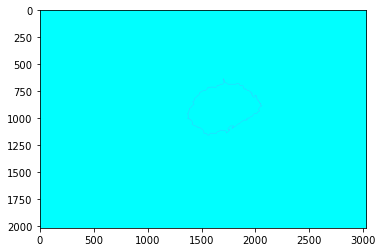

In [89]:
#CORRECT
im = plt.imread('../../data/Raw/example_image/ISIC_0001769.jpg')
mask=plt.imread('../../data/Raw/example_segmentation/ISIC_0001769_segmentation.png')
area = np.sum(mask)
#print(area)
struct_el = morphology.disk(1)
mask_eroded = morphology.binary_erosion(mask, struct_el)
image_perimeter = mask - mask_eroded
#print(image_perimeter)
#print(np.sum(image_perimeter))
plt.imshow(image_perimeter,cmap = 'cool')

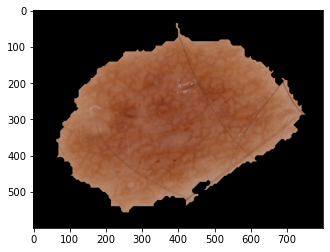

In [10]:
#MEASURE AND MAYBE MAKE AN AVERAGE OF RGB COLORS<HOW TO DETECT IF THIS IS BENING OR MALIGN BASED ON COLOR?>
im1 = im.copy()
im1[mask==0] = 0
new_arr_no_0 = im1[np.where(im1!=0)]
#CROP FOR EVERY PICTURE < FOR BETTER PERFORMANCE
#plt.imshow(im1)
mask2 = im1[600:1200,1300:2100,:]
plt.imshow(mask2)

In [47]:
# COLOUR COUNTS FOR POSSIBLE COLOR ANALYSIS
color_count = {}
#width, height = image.size
image = Image.fromarray(mask2)
rgb_image = image.convert('RGB')

rgb = rgb_image.getpixel((686, 519))
print(rgb)

(0, 0, 0)


In [13]:
image = cv2.imread('../../data/Raw/example_segmentation/ISIC_0001769_segmentation.png')

In [14]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

(520, 687, 3)


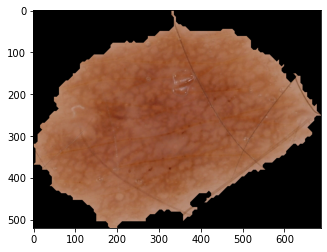

In [64]:
img2 = crop(mask2)
plt.imshow(img2)
xy_coords = np.flip(np.column_stack(np.where(img2 >= 0)), axis=1)
xy_coords
a_del = np.delete(xy_coords, 0, 1)
a_del = a_del[::3][:, [0, 1]]
print(img2.shape)

In [63]:
rgb1 = [rgb_image.getpixel((int(i[0]),int(i[1]))) for i in a_del]
print(len(rgb1))

357240


In [65]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [90]:
#RGB2HEX
dd = [RGB2HEX(i) for i in rgb1]
ss = list(set(dd))
print(ss)


['#9d6856', '#9f5633', '#83482a', '#946150', '#a4725b', '#915442', '#803d2a', '#834320', '#935137', '#a37663', '#95583b', '#a16a56', '#893f1a', '#b6866f', '#a96840', '#8c4330', '#90543a', '#8b411c', '#873d24', '#ad6b51', '#7b3422', '#97533c', '#a15c33', '#bb8b74', '#9e6b5a', '#9c5c39', '#af7456', '#a1613d', '#b27c60', '#be8768', '#a6664a', '#955026', '#b27852', '#b07d68', '#a66c47', '#94533d', '#ad764f', '#9f7159', '#924c33', '#ab8060', '#b18062', '#ae7750', '#974d32', '#854c38', '#c0826b', '#9e5e3a', '#ad7f67', '#af7f69', '#934425', '#ab684b', '#b68e75', '#83351e', '#9e5c3a', '#b07b53', '#94664c', '#945b4a', '#a96c50', '#9d6e54', '#b2744f', '#9e5f34', '#803820', '#98593a', '#af775c', '#8c4124', '#894b36', '#a56d48', '#833818', '#b48976', '#b77a5e', '#bb8972', '#a5684b', '#8f5031', '#bc8c75', '#b08467', '#823c23', '#9b4b26', '#904929', '#9d6447', '#813f27', '#934c3a', '#ab7f64', '#b28564', '#934727', '#87452f', '#a87469', '#a36951', '#b4805b', '#924e29', '#b27757', '#b38a6a', '#80351e'